# `Exploratory data Analysis on Churn Modelling`

### Loading the dataset

In [354]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [355]:
data=pd.read_csv('Churn_Modelling.csv')

In [356]:
data.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [357]:
data.drop(['RowNumber','CustomerId'],axis=1,inplace=True)

In [358]:
data.columns

Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

In [359]:
data.shape

(10000, 12)

In [360]:
data.isnull().sum()   # no null values

Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

<br />
<br />
<br />

## `Summary of Variables`
### Categorical:
> - Geography 
> - Gender
> - HasCrCard
> - IsActiveMember
> - Exited
> - Tenure
> - No Of Products


### Numerical:
> - CreditScore
> - Age 
> - Balance
> - EstimatedSalary


---

## `Univariate Analysis -------------------------------------`

---

### `Catagorical`
> - Geography 
> - Gender
> - HasCrCard
> - IsActiveMember
> - Exited
> - Tenure
> - No Of Products

### Geography

In [361]:
data['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

<AxesSubplot:xlabel='Geography', ylabel='count'>

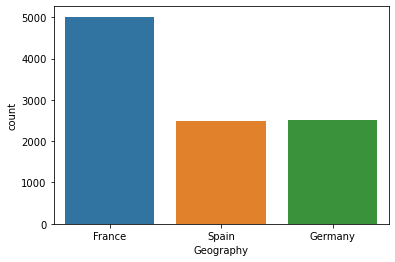

In [362]:
sns.countplot(data['Geography'])

#### `France has maximum customers`

### Gender

In [363]:
data['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

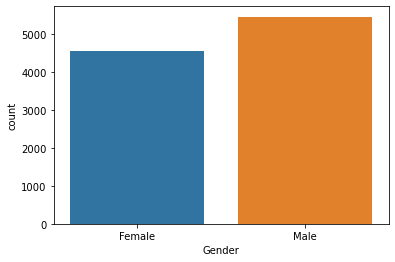

In [364]:
sns.countplot(data['Gender'])

#### `Maximum customers are Males`

### Has Credit Card

In [365]:
data['HasCrCard'].value_counts()

1    7055
0    2945
Name: HasCrCard, dtype: int64

<AxesSubplot:xlabel='HasCrCard', ylabel='count'>

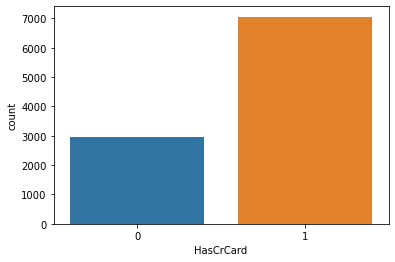

In [366]:
sns.countplot(data['HasCrCard'])

#### `Max customers have credit card`

### IsActiveMember

In [367]:
data['IsActiveMember'].value_counts()

1    5151
0    4849
Name: IsActiveMember, dtype: int64

<AxesSubplot:xlabel='IsActiveMember', ylabel='count'>

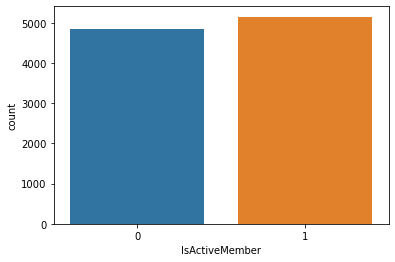

In [368]:
sns.countplot(data['IsActiveMember'])

#### `Maximum customers are active customers`

### Exited

In [369]:
data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

<AxesSubplot:xlabel='Exited', ylabel='count'>

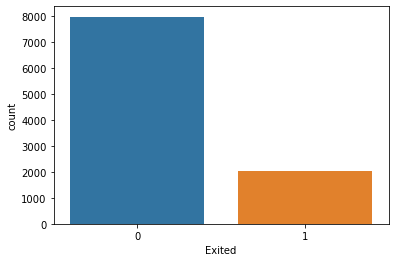

In [370]:
sns.countplot(data['Exited'])

#### `Maximum customers are not going to churn`

### Tenure

In [371]:
data['Tenure'].value_counts()

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64

Text(0, 0.5, 'Number of Customers')

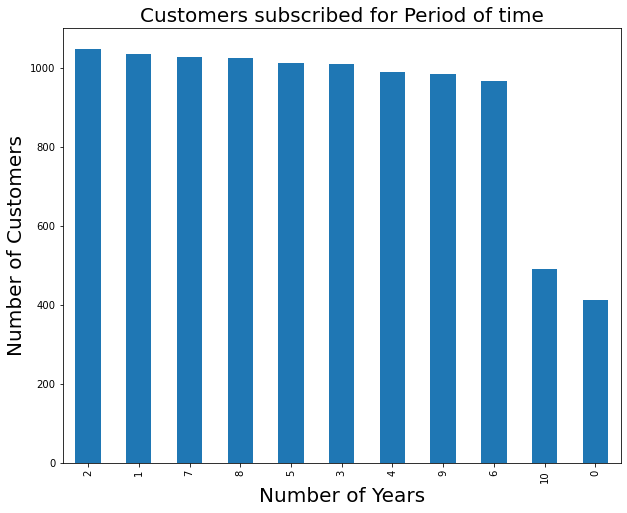

In [372]:
plt.figure(figsize=(10,8))
data['Tenure'].value_counts().sort_values(ascending=False).plot.bar()
plt.title('Customers subscribed for Period of time',fontsize=20)
plt.xlabel('Number of Years',fontsize=20)
plt.ylabel('Number of Customers',fontsize=20)

#### `These customers had subscribed for a good amount of time`

### No of Products

Text(0.5, 1.0, 'Customers subscribed for Products')

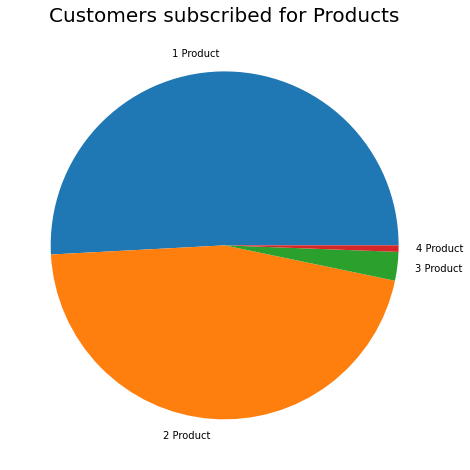

In [373]:
plt.figure(figsize=(10,8))
plt.pie(data['NumOfProducts'].value_counts(),labels=['1 Product','2 Product','3 Product','4 Product']);
plt.title('Customers subscribed for Products',fontsize=20)

In [374]:
print(f'{5084/100}% Customers subscribed for 1 product')
print(f'{4590/100}% Customers subscribed for 2 products')
print(f'{266/100}% Customers subscribed for 3 products')
print(f'{60/100}% Customers subscribed for 4 products')

50.84% Customers subscribed for 1 product
45.9% Customers subscribed for 2 products
2.66% Customers subscribed for 3 products
0.6% Customers subscribed for 4 products


### `Numerical`
> - CreditScore
> - Age 
> - Balance
> - EstimatedSalary

### CreditScore

<AxesSubplot:xlabel='CreditScore', ylabel='Density'>

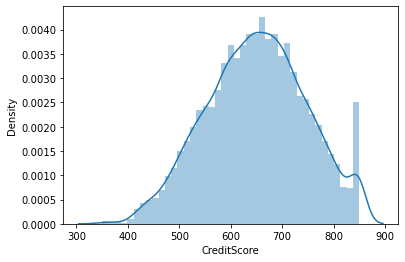

In [375]:
sns.distplot(data['CreditScore'])

<AxesSubplot:xlabel='CreditScore'>

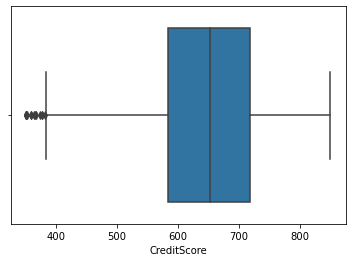

In [376]:
sns.boxplot(data['CreditScore'])

In [377]:
data['CreditScore'].describe()

count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: CreditScore, dtype: float64

In [378]:
q1=np.percentile(data['CreditScore'],25)
q3=np.percentile(data['CreditScore'],75)
IQR=q3-q1
good_value=1.5 * IQR
lower_bound=q1-good_value
upper_bound=q3+good_value
print(f'Lower Bound:{lower_bound} and Upper Bound:{upper_bound}')

Lower Bound:383.0 and Upper Bound:919.0


In [379]:
# CODE HERE
data = data[data['CreditScore'] > lower_bound]   # remove outliers
data

Surname  CreditScore Geography  Gender  Age  Tenure    Balance  \
0      Hargrave          619    France  Female   42       2       0.00   
1          Hill          608     Spain  Female   41       1   83807.86   
2          Onio          502    France  Female   42       8  159660.80   
3          Boni          699    France  Female   39       1       0.00   
4      Mitchell          850     Spain  Female   43       2  125510.82   
...         ...          ...       ...     ...  ...     ...        ...   
9995   Obijiaku          771    France    Male   39       5       0.00   
9996  Johnstone          516    France    Male   35      10   57369.61   
9997        Liu          709    France  Female   36       7       0.00   
9998  Sabbatini          772   Germany    Male   42       3   75075.31   
9999     Walker          792    France  Female   28       4  130142.79   

      NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0                 1          1               1        101348.88       1  
1                 1          0               1        112542.58       0  
2                 3          1               0        113931.57       1  
3                 2          0               0         93826.63       0  
4                 1          1               1         79084.10       0  
...             ...        ...             ...              ...     ...  
9995              2          1               0         96270.64       0  
9996              1          1               1        101699.77       0  
9997              1          0               1         42085.58       1  
9998              2          1               0         92888.52       1  
9999              1          1               0         38190.78       0  

[9984 rows x 12 columns]

#### `Population has a mean CreditScore of 650`

### Age

<AxesSubplot:xlabel='Age', ylabel='Density'>

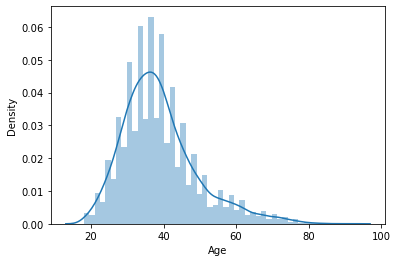

In [380]:
sns.distplot(data['Age'])

<AxesSubplot:xlabel='Age'>

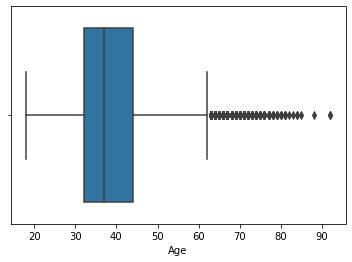

In [381]:
sns.boxplot(data['Age'])

In [382]:
data['Age'].describe()

count    9984.000000
mean       38.914263
std        10.487614
min        18.000000
25%        32.000000
50%        37.000000
75%        44.000000
max        92.000000
Name: Age, dtype: float64

#### `outliers of Age need not to be removed as they can exist`

### Balance

<AxesSubplot:xlabel='Balance', ylabel='Density'>

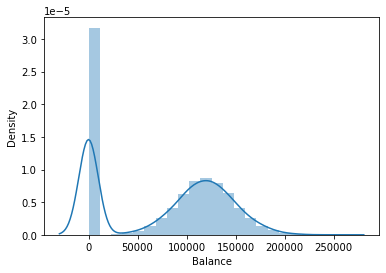

In [383]:
sns.distplot(data['Balance'])

<AxesSubplot:xlabel='Balance'>

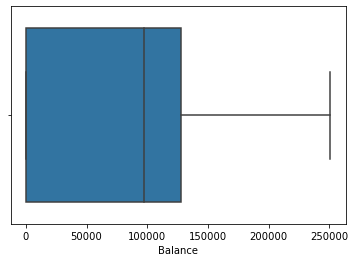

In [384]:
sns.boxplot(data['Balance'])

In [385]:
data['Balance'].describe()

count      9984.000000
mean      76469.513735
std       62397.860249
min           0.000000
25%           0.000000
50%       97173.290000
75%      127638.027500
max      250898.090000
Name: Balance, dtype: float64

#### `Zero Bank Balance`

In [386]:
data[data['Balance'] == 0].shape

(3612, 12)

In [387]:
data['Balance'].shape

(9984,)

In [388]:
total_percentage_of_customers_having_zero_balance=3617/100
print(f'{total_percentage_of_customers_having_zero_balance}%')

36.17%


#### `36.17% customers do not have any money in there bank balance`

### Estimated Salary

<AxesSubplot:xlabel='EstimatedSalary', ylabel='Density'>

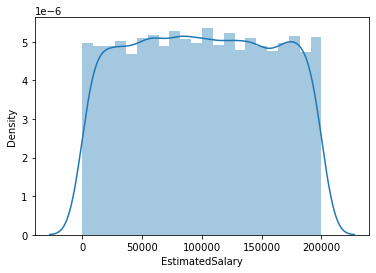

In [389]:
sns.distplot(data['EstimatedSalary'])

<AxesSubplot:xlabel='EstimatedSalary'>

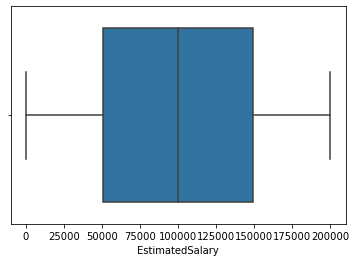

In [390]:
sns.boxplot(data['EstimatedSalary'])

In [391]:
data['EstimatedSalary'].describe()

count      9984.000000
mean     100029.413677
std       57521.025873
min          11.580000
25%       50908.022500
50%      100114.385000
75%      149373.527500
max      199992.480000
Name: EstimatedSalary, dtype: float64

#### `Uniformly Distributed Estimated Salary`

------

----------

## `Bivariate Analysis between all columns, useful for Feature Engineering and Feature Selection`

-----------

### `Hypothesis testing On Churn Modeling Dataset`

## `Cat vs Cat : Chi-Square Test`

###  Geography vs Gender

In [392]:
two_way_frquency=pd.crosstab(data['Geography'],data['Gender'])
two_way_frquency

Gender     Female  Male
Geography              
France       2257  2751
Germany      1191  1314
Spain        1086  1385

In [393]:
from scipy.stats import chi2_contingency

x2_value , p_value, df, expected_values = chi2_contingency(two_way_frquency)

In [394]:
p_value   # p-value < 0.05 --- accept alternate hypothesis

0.03069321594680612

#### `Geography and Gender are related`

#### `From all the three countries maximum customers are males`

###  HasCrCard vs Gender

In [395]:
two_way_frquency=pd.crosstab(data['HasCrCard'],data['Gender'])
two_way_frquency

Gender     Female  Male
HasCrCard              
0            1349  1593
1            3185  3857

In [396]:
from scipy.stats import chi2_contingency

x2_value , p_value, df, expected_values = chi2_contingency(two_way_frquency)

In [397]:
p_value  # p_value > 0.05 -------- accept null hypothesis

0.5827642219328532

#### `HasCrCard and Gender are not related`


###  IsActiveMember vs Gender

In [398]:
two_way_frquency=pd.crosstab(data['IsActiveMember'],data['Gender'])
two_way_frquency

Gender          Female  Male
IsActiveMember              
0                 2251  2586
1                 2283  2864

In [399]:
from scipy.stats import chi2_contingency

x2_value , p_value, df, expected_values = chi2_contingency(two_way_frquency)

In [400]:
p_value # p-value < .05 ---- accept alternate hypothesis

0.03019721951693615

#### `Gender and IsActive Member are not related`

###  Geography vs Exited

In [401]:
two_way_frquency=pd.crosstab(data['Geography'],data['Exited'])
two_way_frquency

Exited        0    1
Geography           
France     4204  804
Germany    1695  810
Spain      2064  407

In [402]:
from scipy.stats import chi2_contingency

x2_value , p_value, df, expected_values = chi2_contingency(two_way_frquency)

In [403]:
p_value # p-value < .05 ---- accept alternate hypothesis

1.540005467877543e-66

#### `Geography and Exited are related`

#### `From all the all countries maximum customers do not wish to churn`

---

## `Num vs Num : Correlation Test`

###  Age vs CreditScore

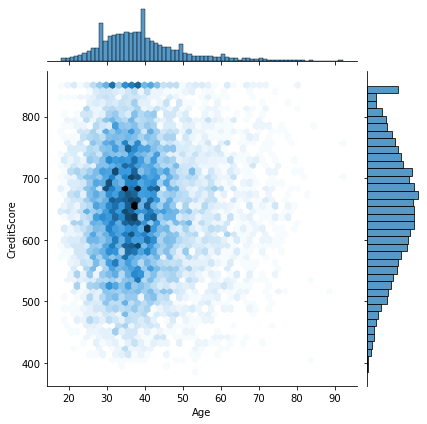

In [404]:
sns.jointplot('Age','CreditScore',data=data,kind='hex')

In [405]:
from scipy.stats import pearsonr

correlation, p_value = pearsonr(data['Age'],data['CreditScore'])

In [406]:
correlation    # weak or no association

-0.0017588505820302263

In [407]:
p_value    # accept null hypothesis 

0.8605120166502521

#### `Age and CreditScore are not related`

### CreditScore vs Balance

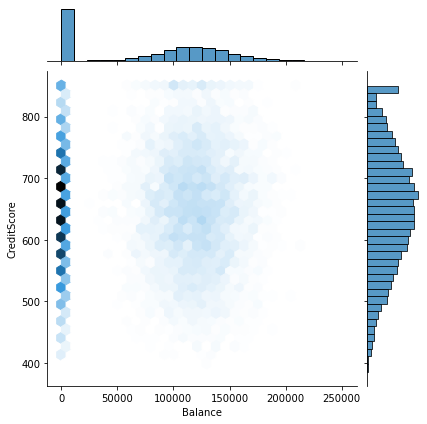

In [408]:
sns.jointplot('Balance','CreditScore',data=data,kind='hex')

In [409]:
from scipy.stats import pearsonr

correlation, p_value = pearsonr(data['CreditScore'],data['Balance'])

In [410]:
correlation

0.007166084172213107

In [411]:
p_value

0.4740194815769117

#### `CreditScore and Balance are not related`

###  Age vs Balance

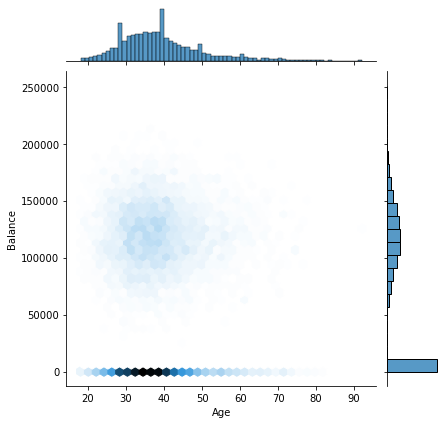

In [412]:
sns.jointplot('Age','Balance',data=data,kind='hex')

In [413]:
from scipy.stats import pearsonr

correlation, p_value = pearsonr(data['Age'],data['Balance'])

In [414]:
p_value   # reject null hypothesis

0.004483724661931716

In [415]:
correlation   # weak association

0.02844016192504907

#### `Age and Balance are related ----------- very Low correlation but p_value rejects null hypothesis **** Suspicious ****`
#### `There are people from all age groups who have zero balance in thier account`

### Age vs EstimatedSalary

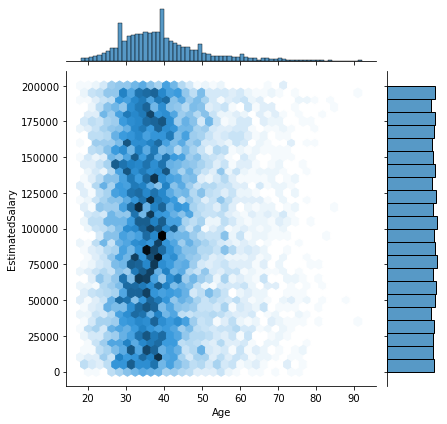

In [416]:
sns.jointplot('Age','EstimatedSalary',data=data,kind='hex')

In [417]:
from scipy.stats import pearsonr

correlation, p_value = pearsonr(data['EstimatedSalary'],data['Age'])

In [418]:
correlation

-0.007998154298014443

In [419]:
p_value

0.4242393650248728

#### `Age and EstimatedSalary are not related`

###  EsimatedSalary vs Balance

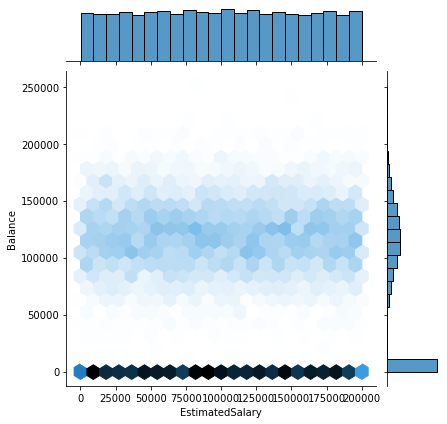

In [420]:
sns.jointplot('EstimatedSalary','Balance',data=data,kind='hex')

In [421]:
from scipy.stats import pearsonr

correlation, p_value = pearsonr(data['EstimatedSalary'],data['Balance'])

In [422]:
correlation   # weak association

0.012493482570728522

In [423]:
p_value    # accept null hypothesis

0.21194289141759556

#### `EstimatedSalary and Balance are not related`

###  CreditScore vs EstimatedSalary

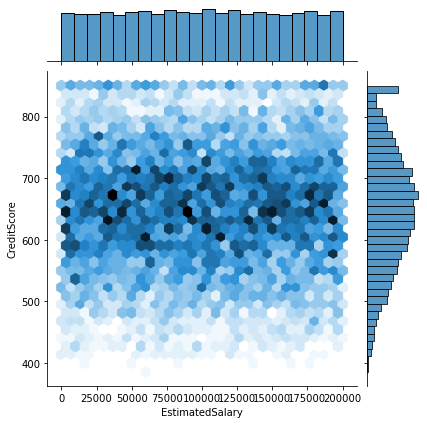

In [424]:
sns.jointplot('EstimatedSalary','CreditScore',data=data,kind='hex')

In [425]:
from scipy.stats import pearsonr

correlation, p_value = pearsonr(data['EstimatedSalary'],data['CreditScore'])

In [426]:
correlation

0.0017927021504697284

In [427]:
p_value    # accept null hypothesis

0.8578556821343827

#### `EstimatedSalary and CreditScore are not related`

###  CreditScore Vs Balance

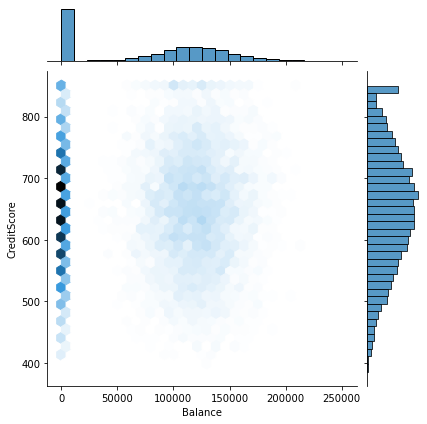

In [428]:
sns.jointplot('Balance','CreditScore',data=data,kind='hex')

In [429]:
from scipy.stats import pearsonr

correlation, p_value = pearsonr(data['Balance'],data['CreditScore'])

In [430]:
correlation

0.007166084172213107

In [431]:
p_value   # Accept null hypothesis

0.4740194815769117

#### `Balance and CreditScore are not related`

---

<br />
<br />

## ` Summary of Variables`
### Categorical:
> - Geography 
> - Gender
> - HasCrCard
> - IsActiveMember
> - Exited
> - Tenure
> - No Of Products


### Numerical:
> - CreditScore
> - Age 
> - Balance
> - EstimatedSalary


## `Cat vs Num : T and Anova Test`

--------

## `EstimatedSalary`

### vs Gender 

In [432]:
grp_female = data.loc[data["Gender"]=='Female','EstimatedSalary']
grp_male = data.loc[data["Gender"]=='Male','EstimatedSalary']
from scipy.stats import ttest_ind
ttest_results = ttest_ind(grp_female,grp_male)
ttest_results

Ttest_indResult(statistic=0.7826820837911245, pvalue=0.4338323927077409)

<AxesSubplot:xlabel='Gender', ylabel='EstimatedSalary'>

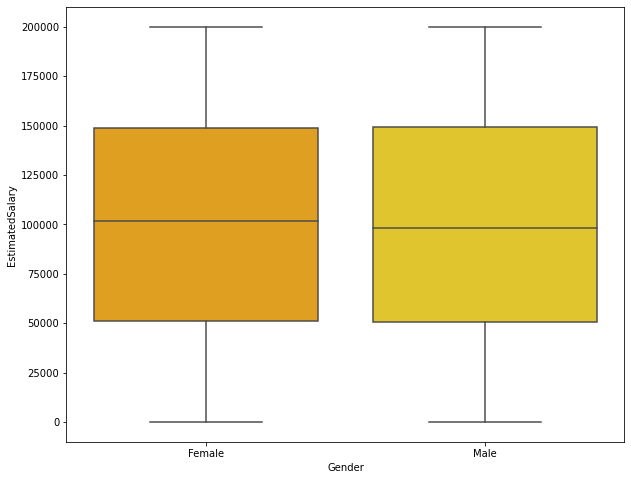

In [433]:
plt.figure(figsize=(10,8))
sns.boxplot(y='EstimatedSalary',x='Gender',data=data,palette='Wistia_r')

#### `Gender and EstimatedSalary are not related`

### vs HasCrCard

In [434]:
yes_CrCard = data.loc[data["HasCrCard"]==1,'EstimatedSalary']
no_CrCard = data.loc[data["HasCrCard"]==0,'EstimatedSalary']
from scipy.stats import ttest_ind
ttest_results = ttest_ind(yes_CrCard,no_CrCard)
ttest_results

Ttest_indResult(statistic=-1.0334774358730578, pvalue=0.3014055620795126)

<AxesSubplot:xlabel='HasCrCard', ylabel='EstimatedSalary'>

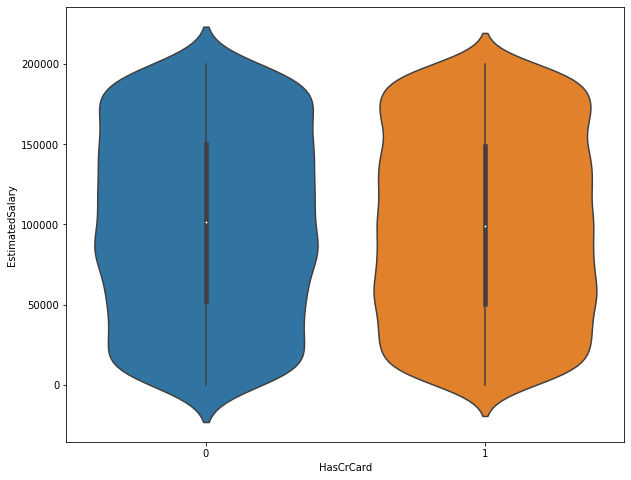

In [435]:
plt.figure(figsize=(10,8))
sns.violinplot(y='EstimatedSalary',x='HasCrCard',data=data)

#### `HasCrCard and EstimatedSalary are not related`

### vs IsActiveMember

In [436]:
yes_active = data.loc[data["IsActiveMember"]==1,'EstimatedSalary']
no_active = data.loc[data["IsActiveMember"]==0,'EstimatedSalary']
from scipy.stats import ttest_ind
ttest_results = ttest_ind(yes_active,no_active)
ttest_results

Ttest_indResult(statistic=-1.1275967146024835, pvalue=0.25951737771433464)

<AxesSubplot:xlabel='IsActiveMember', ylabel='EstimatedSalary'>

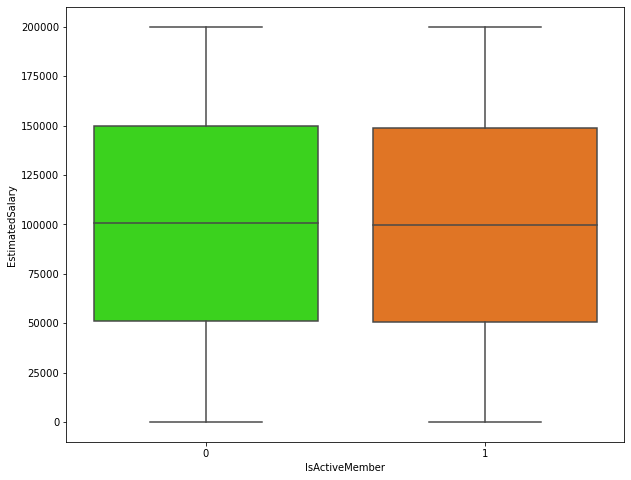

In [437]:
plt.figure(figsize=(10,8))
sns.boxplot(y='EstimatedSalary',x='IsActiveMember',data=data,palette='gist_ncar')

#### `IsActiveMember and EstimatedSalary are not related`

### vs Exited

In [438]:
yes_churn = data.loc[data["Exited"]==1,'EstimatedSalary']
no_churn = data.loc[data["Exited"]==0,'EstimatedSalary']
from scipy.stats import ttest_ind
ttest_results = ttest_ind(yes_churn,no_churn)
ttest_results

Ttest_indResult(statistic=1.0034753181571265, pvalue=0.3156559040271955)

<AxesSubplot:xlabel='Exited', ylabel='EstimatedSalary'>

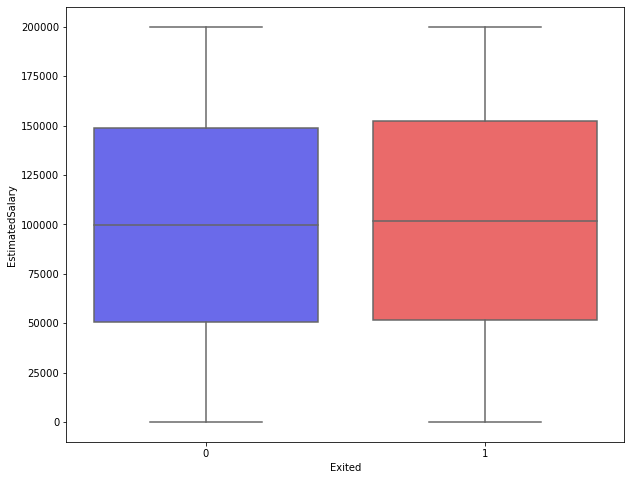

In [439]:
plt.figure(figsize=(10,8))
sns.boxplot(y='EstimatedSalary',x='Exited',data=data,palette='seismic')

#### `Exited and EstimatedSalary are not related`

### vs No Of Products

In [440]:
grp_1 = data.loc[data["NumOfProducts"]==1,'EstimatedSalary']
grp_2 = data.loc[data["NumOfProducts"]==2,'EstimatedSalary']
grp_3 = data.loc[data["NumOfProducts"]==3,'EstimatedSalary']
grp_4 = data.loc[data["NumOfProducts"]==4,'EstimatedSalary']
from scipy.stats import f_oneway

f_oneway(grp_1,grp_2,grp_3,grp_4)

F_onewayResult(statistic=0.8741500059995244, pvalue=0.4536044633120151)

<AxesSubplot:xlabel='EstimatedSalary', ylabel='Density'>

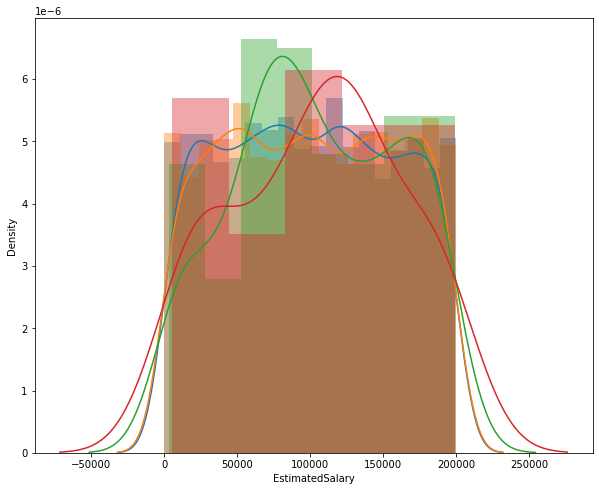

In [441]:
plt.figure(figsize=(10,8))
sns.distplot(grp_1)
sns.distplot(grp_2)
sns.distplot(grp_3)
sns.distplot(grp_4)

#### `No of Products and EstimatedSalary are not related`

### vs Geography 

In [442]:
grp_france = data.loc[data["Geography"]=='France','EstimatedSalary']
grp_germany = data.loc[data["Geography"]=='Germany','EstimatedSalary']
grp_spain = data.loc[data["Geography"]=='Spain','EstimatedSalary']
from scipy.stats import f_oneway

f_oneway(grp_france,grp_germany,grp_spain)

F_onewayResult(statistic=0.6310894090662182, pvalue=0.5320331342084359)

<AxesSubplot:xlabel='EstimatedSalary', ylabel='Density'>

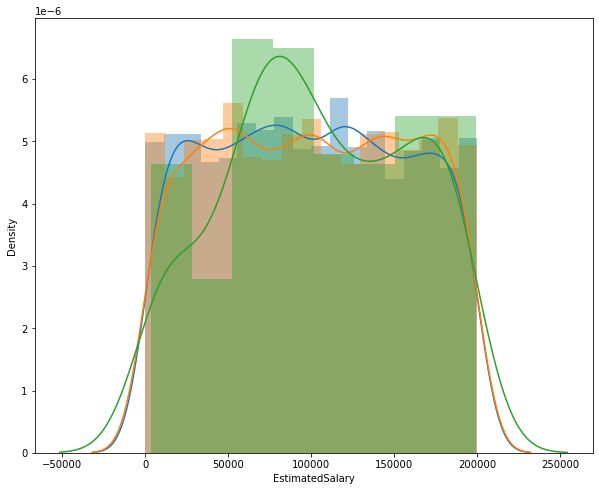

In [443]:
plt.figure(figsize=(10,8))
sns.distplot(grp_1)
sns.distplot(grp_2)
sns.distplot(grp_3)

#### ` Geography and EstimatedSalary are not related`

### vs Tenure

In [444]:
grp_0 = data.loc[data["Tenure"]==0,'EstimatedSalary']
grp_1 = data.loc[data["Tenure"]==1,'EstimatedSalary']
grp_2 = data.loc[data["Tenure"]==2,'EstimatedSalary']
grp_3 = data.loc[data["Tenure"]==3,'EstimatedSalary']
grp_4 = data.loc[data["Tenure"]==4,'EstimatedSalary']
grp_5 = data.loc[data["Tenure"]==5,'EstimatedSalary']
grp_6 = data.loc[data["Tenure"]==6,'EstimatedSalary']
grp_7 = data.loc[data["Tenure"]==7,'EstimatedSalary']
grp_8 = data.loc[data["Tenure"]==8,'EstimatedSalary']
grp_9 = data.loc[data["Tenure"]==9,'EstimatedSalary']
grp_10 = data.loc[data["Tenure"]==10,'EstimatedSalary']
grp_11 = data.loc[data["Tenure"]==11,'EstimatedSalary']
from scipy.stats import f_oneway

f_oneway(grp_0,grp_1,grp_2,grp_3,grp_4,grp_5,grp_6,grp_7,grp_8,grp_9,grp_10)

F_onewayResult(statistic=0.5986547298628383, pvalue=0.816341582687394)

<AxesSubplot:xlabel='Tenure', ylabel='EstimatedSalary'>

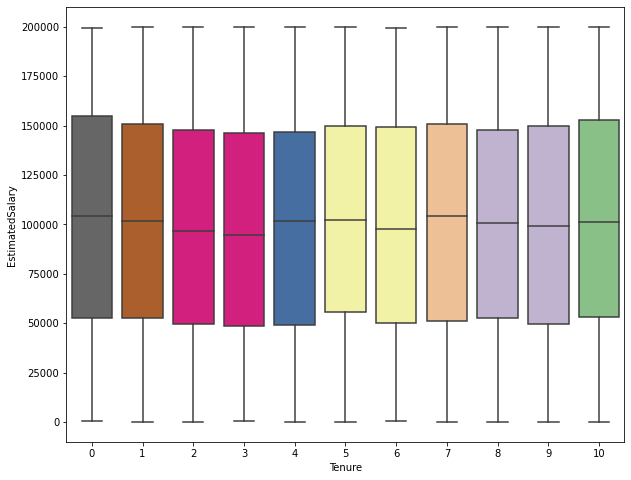

In [445]:
plt.figure(figsize=(10,8))
sns.boxplot(y='EstimatedSalary',x='Tenure',data=data,palette='Accent_r')

#### ` Tenure and EstimatedSalary are not related`

---

## `Balance`

---

### vs Gender

In [446]:
grp_female = data.loc[data["Gender"]=='Female','Balance']
grp_male = data.loc[data["Gender"]=='Male','Balance']
ttest_results = ttest_ind(grp_female,grp_male)
ttest_results

Ttest_indResult(statistic=-1.2550099433632482, pvalue=0.20950453132984276)

<AxesSubplot:xlabel='Gender', ylabel='Balance'>

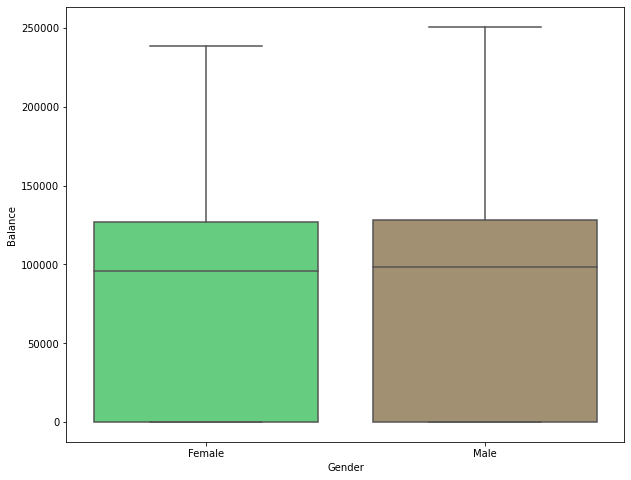

In [447]:
plt.figure(figsize=(10,8))
sns.boxplot(y='Balance',x='Gender',data=data,palette='terrain')

#### `Balance and Gender are not related`

### vs HasCrCard

In [448]:
yes_CrCard = data.loc[data["HasCrCard"]==1,'Balance']
no_CrCard = data.loc[data["HasCrCard"]==0,'Balance']
ttest_results = ttest_ind(yes_CrCard,no_CrCard)
ttest_results

Ttest_indResult(statistic=-1.5121481968969623, pvalue=0.1305278228821503)

<AxesSubplot:xlabel='Balance', ylabel='Density'>

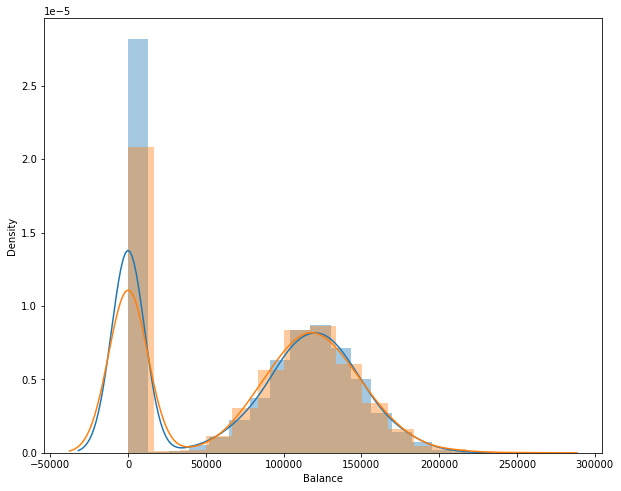

In [449]:
plt.figure(figsize=(10,8))
sns.distplot(yes_CrCard)
sns.distplot(no_CrCard)

#### `Balance and HasCrCard are not related`

### vs IsActiveMember

In [450]:
yes_active = data.loc[data["IsActiveMember"]==1,'Balance']
no_active = data.loc[data["IsActiveMember"]==0,'Balance']
ttest_results = ttest_ind(yes_active,no_active)
ttest_results

Ttest_indResult(statistic=-0.9686002337116204, pvalue=0.3327681542493709)

<AxesSubplot:xlabel='IsActiveMember', ylabel='Balance'>

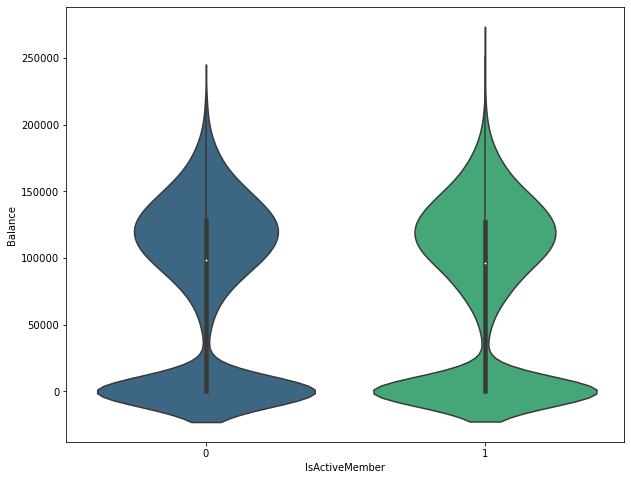

In [451]:
plt.figure(figsize=(10,8))
sns.violinplot(y='Balance',x='IsActiveMember',data=data,palette='viridis')

#### `Balance and IsActiveMember are not related`

### vs Exited

In [452]:
yes_churn = data.loc[data["Exited"]==1,'Balance']
no_churn = data.loc[data["Exited"]==0,'Balance']
ttest_results = ttest_ind(yes_churn,no_churn)
ttest_results

Ttest_indResult(statistic=11.921221955915597, pvalue=1.5250902115730688e-32)

<AxesSubplot:xlabel='Gender', ylabel='Balance'>

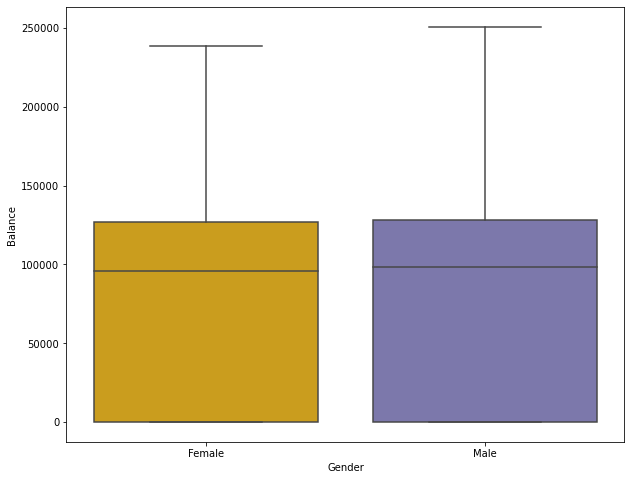

In [453]:
plt.figure(figsize=(10,8))
sns.boxplot(y='Balance',x='Gender',data=data,palette='Dark2_r')

<AxesSubplot:xlabel='Balance', ylabel='Density'>

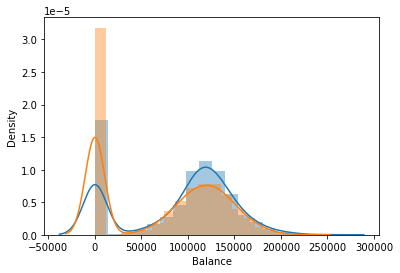

In [454]:
sns.distplot(yes_churn)
sns.distplot(no_churn)

#### `Balance and Exited are related`

- `Majority of the people who have low balance have decided to churn`

- `Majority of the people who have high balance have not decided to churn`


### vs NoOfProducts

In [455]:
grp_1 = data.loc[data["NumOfProducts"]==1,'Balance']
grp_2 = data.loc[data["NumOfProducts"]==2,'Balance']
grp_3 = data.loc[data["NumOfProducts"]==3,'Balance']
grp_4 = data.loc[data["NumOfProducts"]==4,'Balance']
f_oneway(grp_1,grp_2,grp_3,grp_4)

F_onewayResult(statistic=523.1883855778768, pvalue=8.45886744e-316)

<AxesSubplot:xlabel='NumOfProducts', ylabel='Balance'>

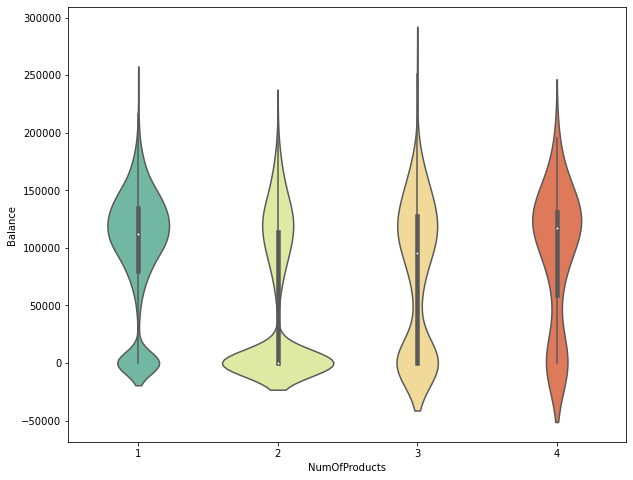

In [456]:
plt.figure(figsize=(10,8))
sns.violinplot(y='Balance',x='NumOfProducts',data=data,palette='Spectral_r')

<AxesSubplot:xlabel='Balance', ylabel='Count'>

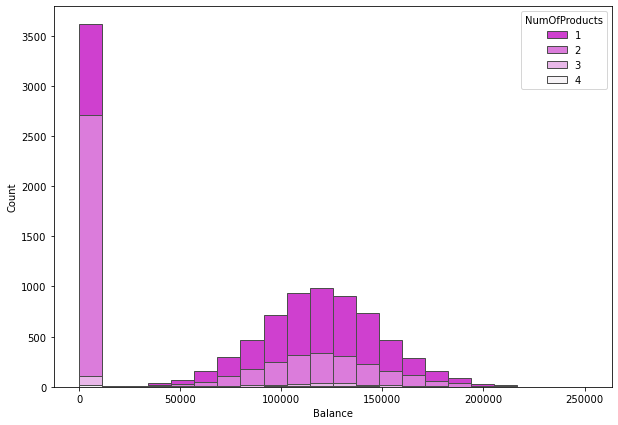

In [457]:
plt.figure(figsize=(10,7))
sns.histplot(x=data['Balance'],hue=data['NumOfProducts'],multiple="stack", palette="light:m_r", edgecolor=".3")

#### `Balance and NoOfProducts are related`
- `Majority of the People with zero to low balance have subscribed two Products`

### vs Geography

In [458]:
grp_france = data.loc[data["Geography"]=='France','Balance']
grp_germany = data.loc[data["Geography"]=='Germany','Balance']
grp_spain = data.loc[data["Geography"]=='Spain','Balance']
f_oneway(grp_france,grp_germany,grp_spain)

F_onewayResult(statistic=957.0005133665476, pvalue=0.0)

<AxesSubplot:xlabel='Geography', ylabel='Balance'>

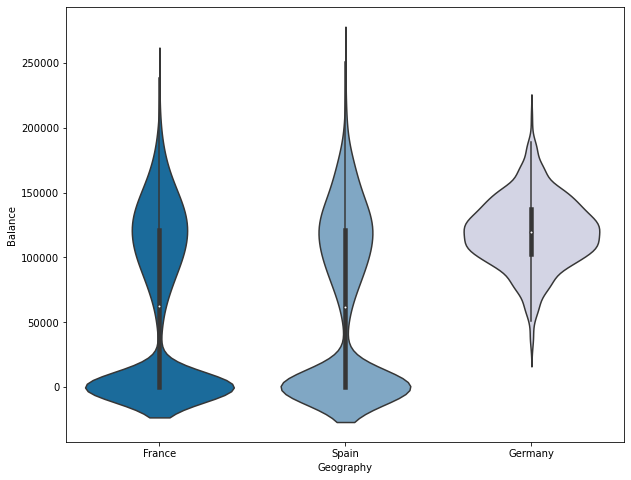

In [459]:
plt.figure(figsize=(10,8))
sns.violinplot(y='Balance',x='Geography',data=data,palette='PuBu_r')

<AxesSubplot:xlabel='Balance', ylabel='Count'>

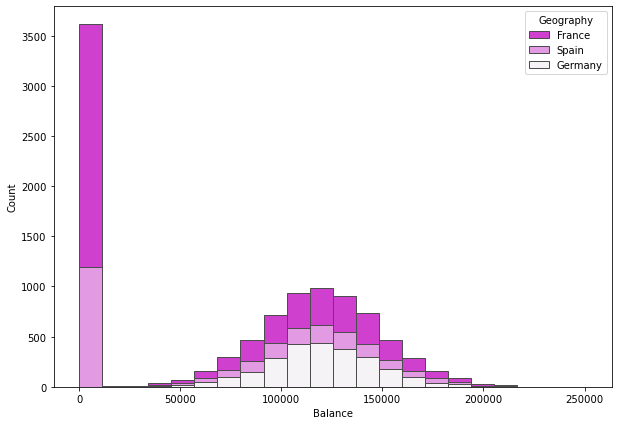

In [476]:
plt.figure(figsize=(10,7))
sns.histplot(x=data['Balance'],hue=data['Geography'],multiple="stack", palette="light:m_r", edgecolor=".3")

- `People with zero to low balance are mostly from France and Spain, Germany do not have any customer with zero balance`
#### `Balance and Geography are related`

### vs Tenure

In [461]:
grp_0 = data.loc[data["Tenure"]==0,'Balance']
grp_1 = data.loc[data["Tenure"]==1,'Balance']
grp_2 = data.loc[data["Tenure"]==2,'Balance']
grp_3 = data.loc[data["Tenure"]==3,'Balance']
grp_4 = data.loc[data["Tenure"]==4,'Balance']
grp_5 = data.loc[data["Tenure"]==5,'Balance']
grp_6 = data.loc[data["Tenure"]==6,'Balance']
grp_7 = data.loc[data["Tenure"]==7,'Balance']
grp_8 = data.loc[data["Tenure"]==8,'Balance']
grp_9 = data.loc[data["Tenure"]==9,'Balance']
grp_10 = data.loc[data["Tenure"]==10,'Balance']
grp_11 = data.loc[data["Tenure"]==11,'Balance']

In [462]:
from scipy.stats import f_oneway

f_oneway(grp_0,grp_1,grp_2,grp_3,grp_4,grp_5,grp_6,grp_7,grp_8,grp_9,grp_10)

F_onewayResult(statistic=0.6886430273527582, pvalue=0.7360854212545243)

<AxesSubplot:xlabel='Tenure', ylabel='Balance'>

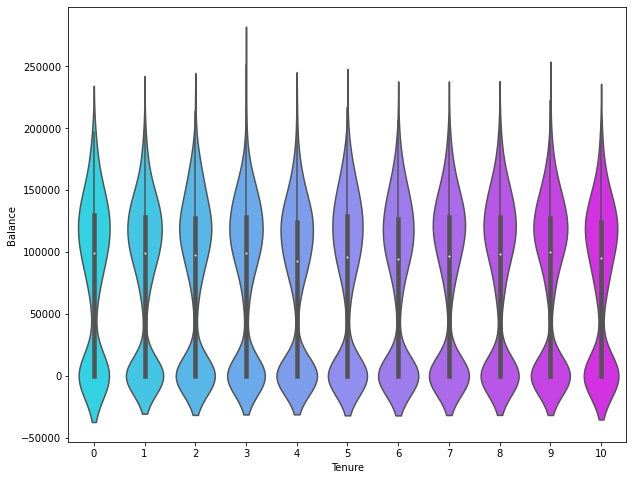

In [463]:
plt.figure(figsize=(10,8))
sns.violinplot(y='Balance',x='Tenure',data=data,palette='cool')

#### `Balance and Tenure are not related`

---

## `Age`

---

### vs Gender

In [464]:
grp_female = data.loc[data["Gender"]=='Female','Age']
grp_male = data.loc[data["Gender"]=='Male','Age']
ttest_results = ttest_ind(grp_female,grp_male)
ttest_results

Ttest_indResult(statistic=2.7200457236671607, pvalue=0.006538587550070831)

<AxesSubplot:xlabel='Gender', ylabel='Age'>

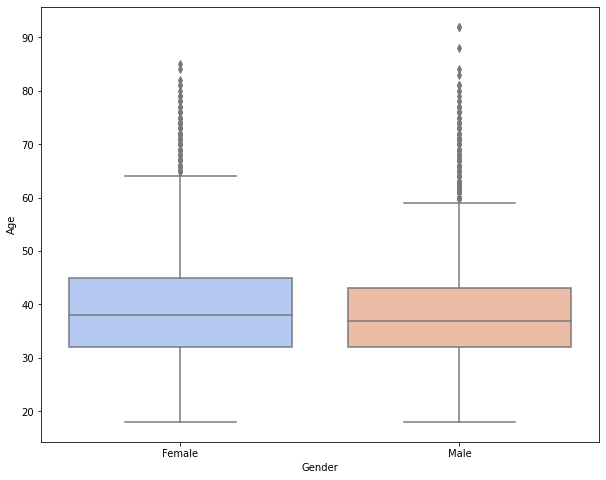

In [465]:
plt.figure(figsize=(10,8))
sns.boxplot(y='Age',x='Gender',data=data,palette='coolwarm')

<AxesSubplot:xlabel='Age', ylabel='Count'>

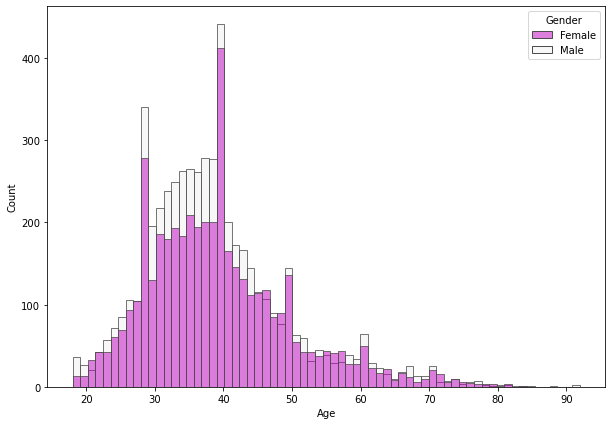

In [471]:
plt.figure(figsize=(10,7))
sns.histplot(x=data['Age'],hue=data['Gender'], palette="light:m_r", edgecolor=".3")

- `Majority of the the customers are males from all age groups` 
#### `Age and Gender are related`

### vs HasCrCard

In [109]:
yes_CrCard = data.loc[data["HasCrCard"]==1,'Age']
no_CrCard = data.loc[data["HasCrCard"]==0,'Age']
ttest_results = ttest_ind(yes_CrCard,no_CrCard)
ttest_results

Ttest_indResult(statistic=-1.2640956932003382, pvalue=0.20622646672373873)

<AxesSubplot:xlabel='Age', ylabel='Density'>

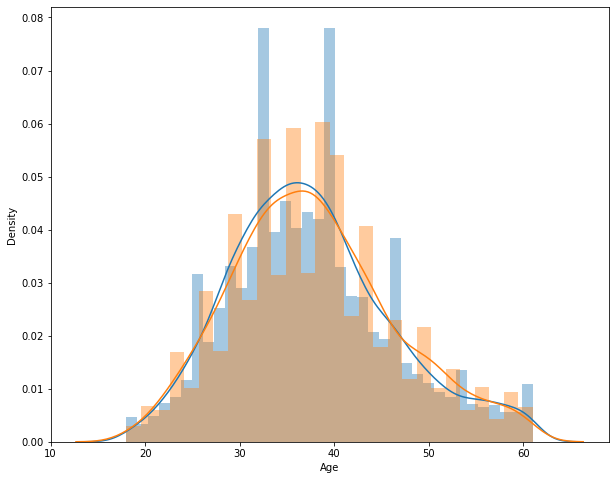

In [110]:
plt.figure(figsize=(10,8))
sns.distplot(yes_CrCard)
sns.distplot(no_CrCard)

<AxesSubplot:xlabel='Age', ylabel='Count'>

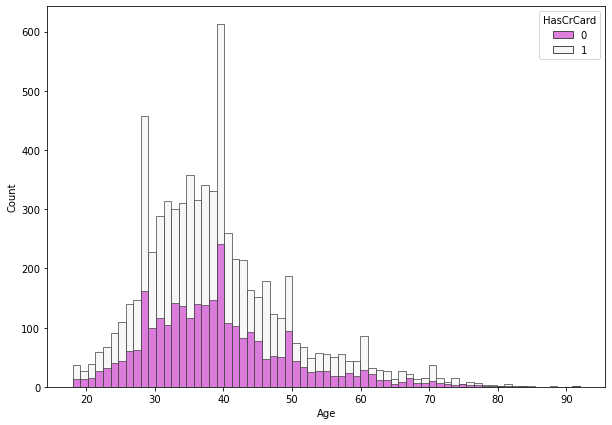

In [474]:
plt.figure(figsize=(10,7))
sns.histplot(x=data['Age'],hue=data['HasCrCard'], palette="light:m_r", edgecolor=".3")

- `Majority of the people that have subscribed, have Credit card`
#### `Age and HasCrCard are not related`

### vs IsActiveMember

In [111]:
yes_active = data.loc[data["IsActiveMember"]==1,'Age']
no_active = data.loc[data["IsActiveMember"]==0,'Age']
ttest_results = ttest_ind(yes_active,no_active)
ttest_results

Ttest_indResult(statistic=1.2341338974339924, pvalue=0.21718331614333217)

<AxesSubplot:xlabel='IsActiveMember', ylabel='Age'>

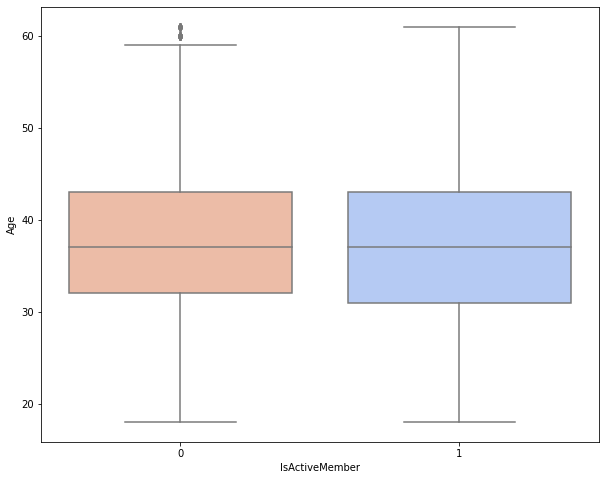

In [112]:
plt.figure(figsize=(10,8))
sns.boxplot(y='Age',x='IsActiveMember',data=data,palette='coolwarm_r')

<AxesSubplot:xlabel='Age', ylabel='Count'>

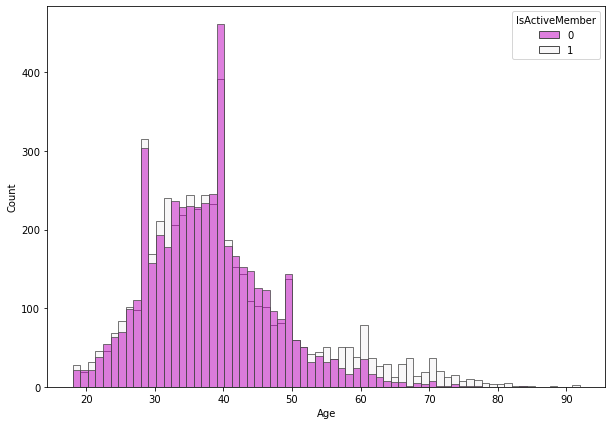

In [478]:
plt.figure(figsize=(10,7))
sns.histplot(x=data['Age'],hue=data['IsActiveMember'],palette="light:m_r", edgecolor=".3")

- `majority of the subscribers who are greater then 60, are activ members`
#### `Age and IsActiveMember are related`

### vs Exited

In [113]:
yes_churn = data.loc[data["Exited"]==1,'Age']
no_churn = data.loc[data["Exited"]==0,'Age']
ttest_results = ttest_ind(yes_churn,no_churn)
ttest_results

Ttest_indResult(statistic=37.7512621578425, pvalue=7.369563025670061e-291)

<AxesSubplot:xlabel='Exited', ylabel='Age'>

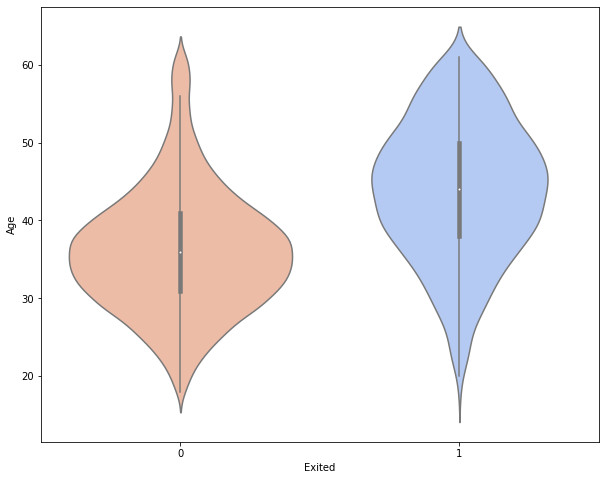

In [114]:
plt.figure(figsize=(10,8))
sns.violinplot(y='Age',x='Exited',data=data,palette='coolwarm_r')

<AxesSubplot:xlabel='Age', ylabel='Count'>

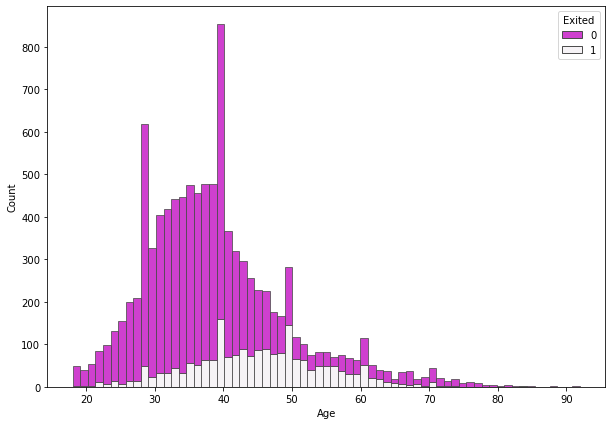

In [480]:
plt.figure(figsize=(10,7))
sns.histplot(x=data['Age'],hue=data['Exited'],multiple="stack",palette="light:m_r", edgecolor=".3")

- `Majority of the people between 50-60 Age have a plan to churn`
#### `Age and Exited are related`

### vs NoOfProducts

In [115]:
grp_1 = data.loc[data["NumOfProducts"]==1,'Age']
grp_2 = data.loc[data["NumOfProducts"]==2,'Age']
grp_3 = data.loc[data["NumOfProducts"]==3,'Age']
grp_4 = data.loc[data["NumOfProducts"]==4,'Age']
f_oneway(grp_1,grp_2,grp_3,grp_4)

F_onewayResult(statistic=73.41114445488793, pvalue=6.157168030507121e-47)

<AxesSubplot:xlabel='NumOfProducts', ylabel='Age'>

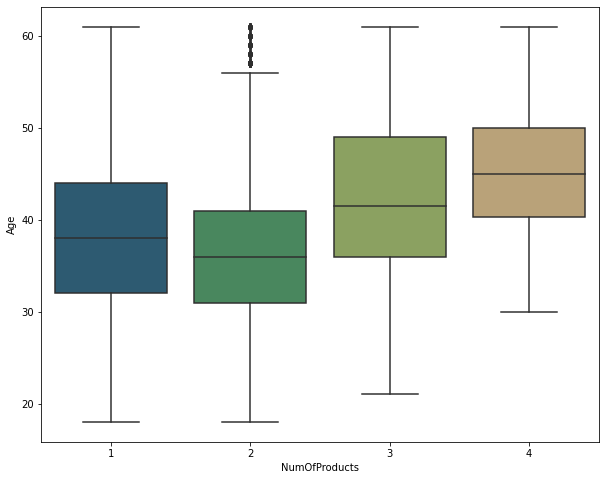

In [116]:
plt.figure(figsize=(10,8))
sns.boxplot(y='Age',x='NumOfProducts',data=data,palette='gist_earth')

<AxesSubplot:xlabel='Age', ylabel='Count'>

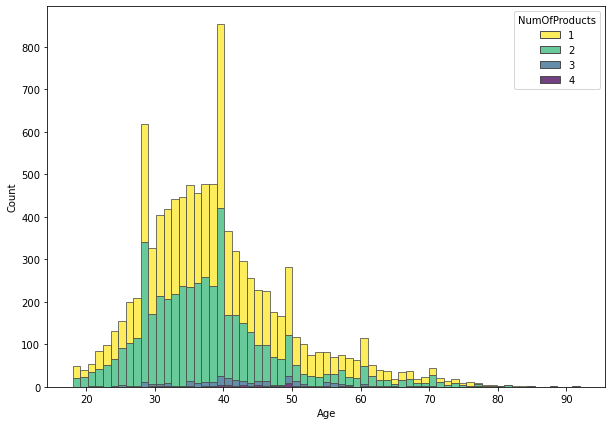

In [486]:
plt.figure(figsize=(10,7))
sns.histplot(x=data['Age'],hue=data['NumOfProducts'],multiple="stack",palette="viridis_r", edgecolor=".3")

- `Customers above 80 have subscribd more than 2 Products`
#### `Age and NumOfProducts are related`

### vs Geography

In [495]:
grp_france = data.loc[data["Geography"]=='France','Age']
grp_germany = data.loc[data["Geography"]=='Germany','Age']
grp_spain = data.loc[data["Geography"]=='Spain','Age']
f_oneway(grp_france,grp_germany,grp_spain)

F_onewayResult(statistic=12.323864646754767, pvalue=4.51243799038626e-06)

<AxesSubplot:xlabel='Geography', ylabel='Age'>

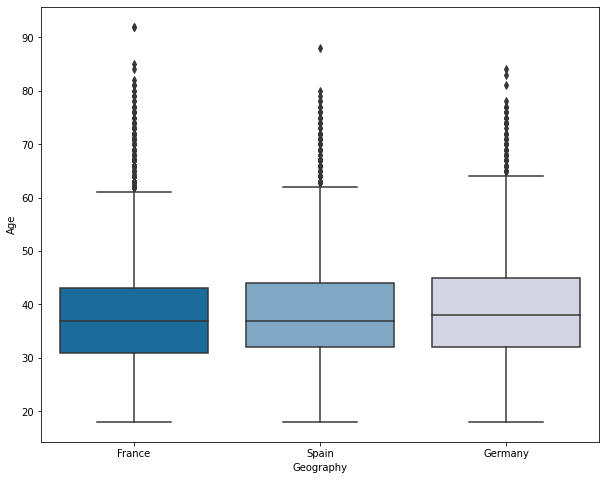

In [496]:
plt.figure(figsize=(10,8))
sns.boxplot(y='Age',x='Geography',data=data,palette='PuBu_r')

<AxesSubplot:xlabel='Age', ylabel='Count'>

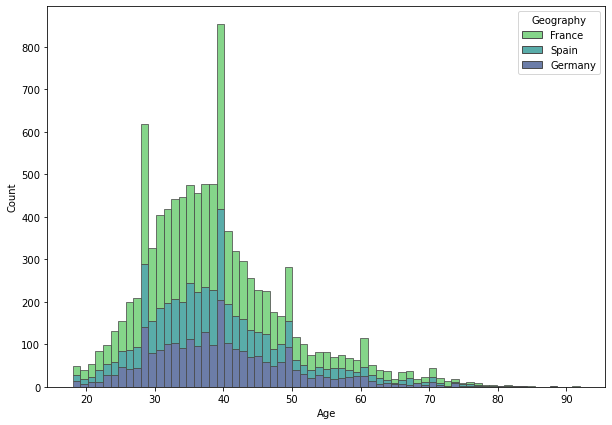

In [497]:
plt.figure(figsize=(10,7))
sns.histplot(x=data['Age'],hue=data['Geography'],multiple="stack",palette="viridis_r", edgecolor=".3")

#### `Age and Geography are related -----------------------  *** Suspicious ***`

### vs Tenure

In [119]:
grp_0 = data.loc[data["Tenure"]==0,'Age']
grp_1 = data.loc[data["Tenure"]==1,'Age']
grp_2 = data.loc[data["Tenure"]==2,'Age']
grp_3 = data.loc[data["Tenure"]==3,'Age']
grp_4 = data.loc[data["Tenure"]==4,'Age']
grp_5 = data.loc[data["Tenure"]==5,'Age']
grp_6 = data.loc[data["Tenure"]==6,'Age']
grp_7 = data.loc[data["Tenure"]==7,'Age']
grp_8 = data.loc[data["Tenure"]==8,'Age']
grp_9 = data.loc[data["Tenure"]==9,'Age']
grp_10 = data.loc[data["Tenure"]==10,'Age']
grp_11 = data.loc[data["Tenure"]==11,'Age']

f_oneway(grp_0,grp_1,grp_2,grp_3,grp_4,grp_5,grp_6,grp_7,grp_8,grp_9,grp_10)

F_onewayResult(statistic=0.8860880829994964, pvalue=0.5453936544872005)

<AxesSubplot:xlabel='Tenure', ylabel='Age'>

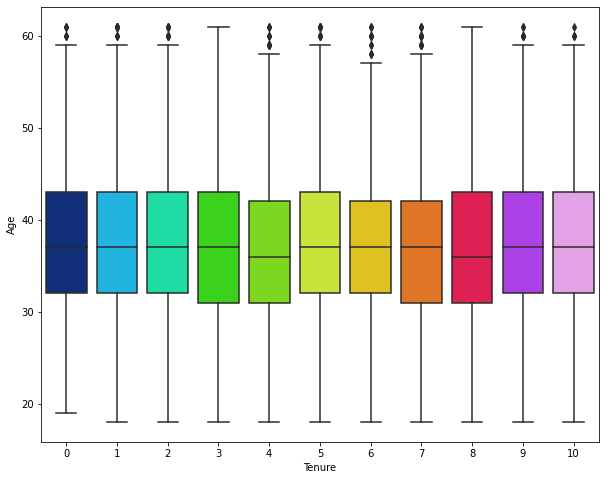

In [120]:
plt.figure(figsize=(10,8))
sns.boxplot(y='Age',x='Tenure',data=data,palette='gist_ncar')

#### `Age and Tenure are not related`

## `CreditScore`

### vs Gender

In [121]:
grp_female = data.loc[data["Gender"]=='Female','CreditScore']
grp_male = data.loc[data["Gender"]=='Male','CreditScore']
ttest_results = ttest_ind(grp_female,grp_male)
ttest_results

Ttest_indResult(statistic=0.42064111099606916, pvalue=0.6740266130345689)

<AxesSubplot:xlabel='Gender', ylabel='CreditScore'>

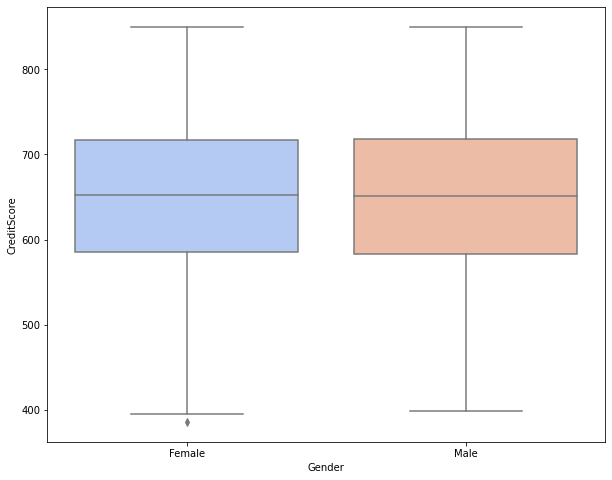

In [122]:
plt.figure(figsize=(10,8))
sns.boxplot(y='CreditScore',x='Gender',data=data,palette='coolwarm')

#### `CredirScore and Gender are not related`

### vs HasCrCard

In [123]:
yes_CrCard = data.loc[data["HasCrCard"]==1,'CreditScore']
no_CrCard = data.loc[data["HasCrCard"]==0,'CreditScore']
ttest_results = ttest_ind(yes_CrCard,no_CrCard)
ttest_results

Ttest_indResult(statistic=-0.24038200767944196, pvalue=0.8100392734893334)

<AxesSubplot:xlabel='CreditScore', ylabel='Density'>

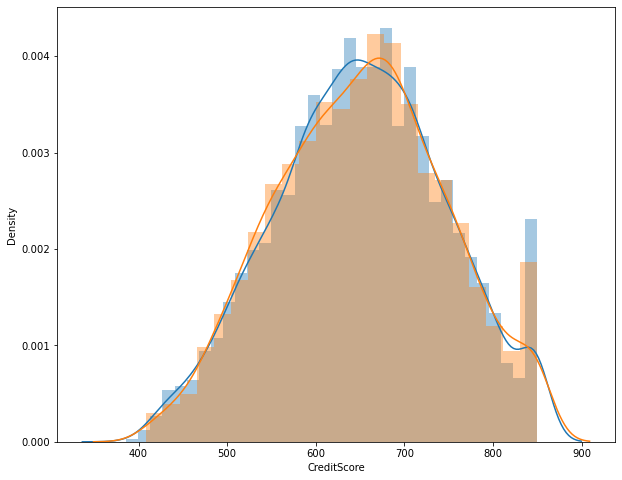

In [124]:
plt.figure(figsize=(10,8))
sns.distplot(yes_CrCard)
sns.distplot(no_CrCard)

#### `CreditScore and HasCrCard are not related`

### vs IsActiveMember

In [125]:
yes_active = data.loc[data["IsActiveMember"]==1,'CreditScore']
no_active = data.loc[data["IsActiveMember"]==0,'CreditScore']
ttest_results = ttest_ind(yes_active,no_active)
ttest_results

Ttest_indResult(statistic=1.9559814660906525, pvalue=0.05049638462428706)

<AxesSubplot:xlabel='IsActiveMember', ylabel='CreditScore'>

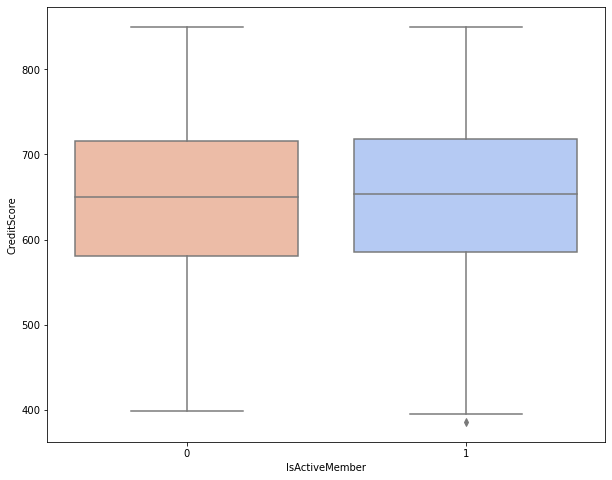

In [126]:
plt.figure(figsize=(10,8))
sns.boxplot(y='CreditScore',x='IsActiveMember',data=data,palette='coolwarm_r')

#### `CreditScore and IsActiveMember are not related`

### vs Exited

In [127]:
yes_churn = data.loc[data["Exited"]==1,'CreditScore']
no_churn = data.loc[data["Exited"]==0,'CreditScore']
ttest_results = ttest_ind(yes_churn,no_churn)
ttest_results

Ttest_indResult(statistic=-1.4829260170560554, pvalue=0.1381269938343482)

<AxesSubplot:xlabel='Exited', ylabel='CreditScore'>

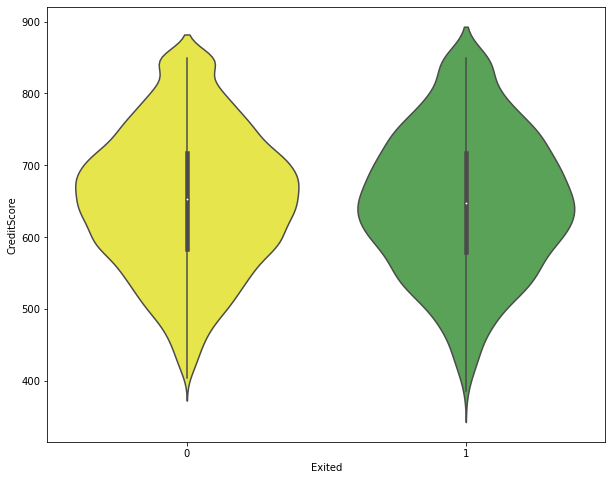

In [128]:
plt.figure(figsize=(10,8))
sns.violinplot(y='CreditScore',x='Exited',data=data,palette='Set1_r')

#### `CreditScore and Exited are not related`

### NumOfProducts

In [129]:
grp_1 = data.loc[data["NumOfProducts"]==1,'CreditScore']
grp_2 = data.loc[data["NumOfProducts"]==2,'CreditScore']
grp_3 = data.loc[data["NumOfProducts"]==3,'CreditScore']
grp_4 = data.loc[data["NumOfProducts"]==4,'CreditScore']
f_oneway(grp_1,grp_2,grp_3,grp_4)

F_onewayResult(statistic=0.5609709512891957, pvalue=0.6407527142069755)

<AxesSubplot:xlabel='NumOfProducts', ylabel='CreditScore'>

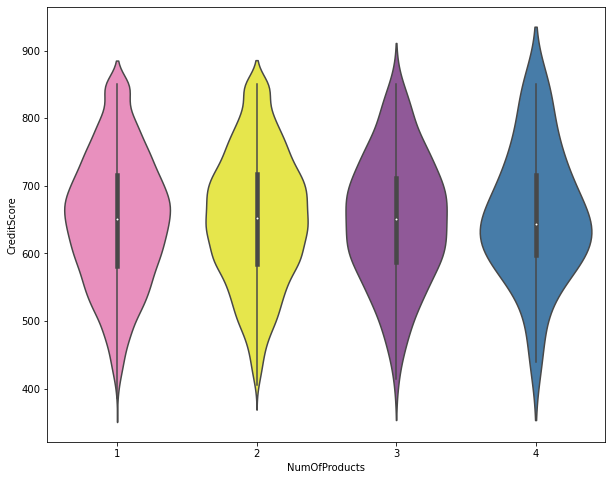

In [130]:
plt.figure(figsize=(10,8))
sns.violinplot(y='CreditScore',x='NumOfProducts',data=data,palette='Set1_r')

#### `CreditScore and NumOfProducts are not related`

### vs Geography

In [131]:
grp_france = data.loc[data["Geography"]=='France','CreditScore']
grp_germany = data.loc[data["Geography"]=='Germany','CreditScore']
grp_spain = data.loc[data["Geography"]=='Spain','CreditScore']
f_oneway(grp_france,grp_germany,grp_spain)

F_onewayResult(statistic=0.7466984502285386, pvalue=0.4739562812391336)

<AxesSubplot:xlabel='CreditScore', ylabel='Density'>

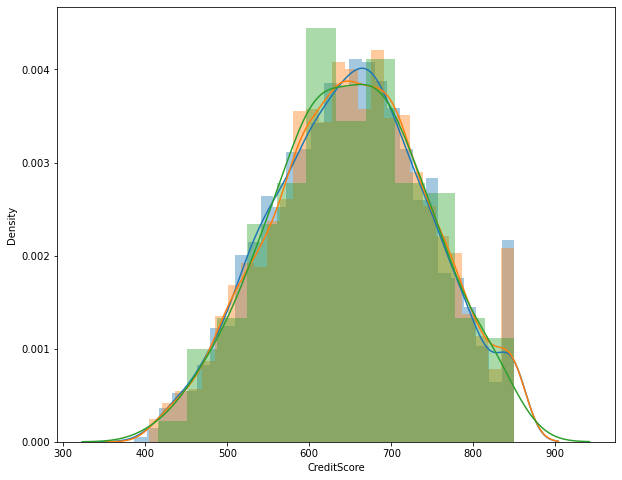

In [132]:
plt.figure(figsize=(10,8))
sns.distplot(grp_1)
sns.distplot(grp_2)
sns.distplot(grp_3)

#### `CreditScore and Geography are not related`

### vs Tenure

In [133]:
grp_0 = data.loc[data["Tenure"]==0,'CreditScore']
grp_1 = data.loc[data["Tenure"]==1,'CreditScore']
grp_2 = data.loc[data["Tenure"]==2,'CreditScore']
grp_3 = data.loc[data["Tenure"]==3,'CreditScore']
grp_4 = data.loc[data["Tenure"]==4,'CreditScore']
grp_5 = data.loc[data["Tenure"]==5,'CreditScore']
grp_6 = data.loc[data["Tenure"]==6,'CreditScore']
grp_7 = data.loc[data["Tenure"]==7,'CreditScore']
grp_8 = data.loc[data["Tenure"]==8,'CreditScore']
grp_9 = data.loc[data["Tenure"]==9,'CreditScore']
grp_10 = data.loc[data["Tenure"]==10,'CreditScore']
grp_11 = data.loc[data["Tenure"]==11,'CreditScore']

f_oneway(grp_0,grp_1,grp_2,grp_3,grp_4,grp_5,grp_6,grp_7,grp_8,grp_9,grp_10)

F_onewayResult(statistic=0.44684510389989107, pvalue=0.9237045960837542)

<AxesSubplot:xlabel='Tenure', ylabel='CreditScore'>

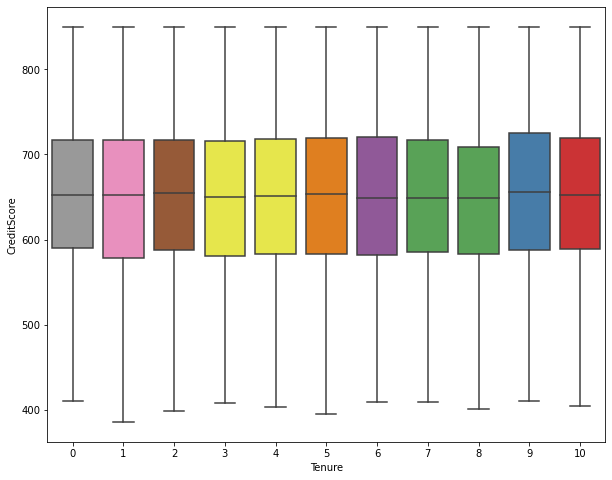

In [134]:
plt.figure(figsize=(10,8))
sns.boxplot(y='CreditScore',x='Tenure',data=data,palette='Set1_r')

#### `CreditScore and Tenure are not related`

-----

## `Conclusion of Bivariate Analysis #####################`:
### `Cat vs Cat`:
#### `Are Related`
> - `Geography and Gender are related`
> - `Geography and Exited are related`
#### `Are not Related`
> - ` Gender and HasCrCard are not related`
> - `Gender and IsActive Member are not related`
---
### `Num vs Num`:
#### `Are Related`
> - `Age and Balance are related`
#### `Are not Related`
> - `Age and CreditScore are not related`
> - `EstimatedSalary and Balance are not related`
> - `EstimatedSalary and CreditScore are not related`
> - `Balance and CreditScore are not related`

---
### `Cat vs Num`:
#### `Are Related`
> - `Balance and Exited are related`
> - `Balance and NoOfProducts are related`
> - `Balance and Geography are related`
> - `Balance and Tenure are related`
> - `Age and Gender are related`
> - `Age and IsActiveMember are related`
> - `Age and Exited are related`
> - `Age and NumOfProducts are related`
> - `Age and Geography are related`


#### `Are not Related`
> - `EstimatedSalary and Gender are not related`
> - `EstimatedSalary and HasCrCard are not related`
> - `EstimatedSalary and IsActiveMember are not related`
> - `EstimatedSalary and Exited are not related`
> - `EstimatedSalary and No of Products are not related`
> - `EstimatedSalary and Geography are not related`
> - `EstimatedSalary and Tenure are not related`
> - `Balance and Gender are not related`
> - `Balance and HasCrCard are not related`
> - `Balance and IsActiveMember are not related`
> - `Age and HasCrCard are not related`
> - `Age and Tenure are not related`
> - `CreditScore and Gender are not related`
> - `CreditScore and HasCrCard are not related`
> - `CreditScore and IsActiveMember are not related`
> - `CreditScore and Exited are not related`
> - `CreditScore and NumOfProducts are not related`
> - `CreditScore and Geography are not related`
> - `CreditScore and Tenure are not related`

-------

## `Bivariate Analysis regarding Target variable i.e Exited ---------------------`


## `Variables`
### Categorical:
> - Geography 
> - Gender
> - HasCrCard
> - IsActiveMember
> - Exited
> - Tenure
> - No Of Products


### Numerical:
> - CreditScore
> - Age 
> - Balance
> - EstimatedSalary


### CreditScore vs Exited

In [135]:
grp_retained = data.loc[data["Exited"]==0,'CreditScore']
grp_closed = data.loc[data["Exited"]==1,'CreditScore']

<AxesSubplot:xlabel='CreditScore', ylabel='Density'>

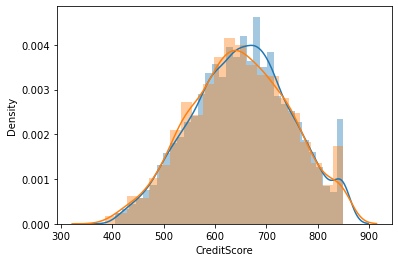

In [136]:
sns.distplot(grp_retained)
sns.distplot(grp_closed)

In [137]:
from scipy.stats import ttest_ind
ttest_results = ttest_ind(grp_retained,grp_closed)

In [138]:
ttest_results

Ttest_indResult(statistic=1.4829260170560554, pvalue=0.1381269938343482)

#### `CreditScore and exited are related`

### Geography vs Exited

In [139]:
two_way_frquency=pd.crosstab(data['Geography'],data['Exited'])
two_way_frquency

Exited        0    1
Geography           
France     4033  769
Germany    1635  772
Spain      1978  386

In [140]:
from scipy.stats import chi2_contingency

x2_value , p_value, df, expected_values = chi2_contingency(two_way_frquency)

In [141]:
p_value

1.0652251938333508e-62

#### `Geography and exited are related`

### Gender vs Exited

In [142]:
two_way_frquency=pd.crosstab(data['Gender'],data['Exited'])
two_way_frquency

Exited     0     1
Gender            
Female  3267  1077
Male    4379   850

In [143]:
from scipy.stats import chi2_contingency

x2_value , p_value, df, expected_values = chi2_contingency(two_way_frquency)

In [144]:
p_value

4.367663108757807e-25

#### `Gender and exited are related`

### Age vs Exited

In [145]:
grp_retained = data.loc[data["Exited"]==0,'Age']
grp_closed = data.loc[data["Exited"]==1,'Age']

<AxesSubplot:xlabel='Age', ylabel='Density'>

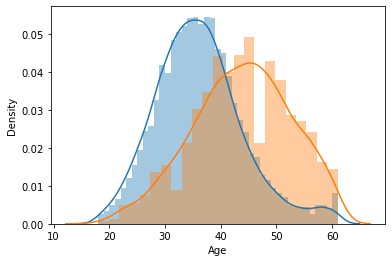

In [146]:
sns.distplot(grp_retained)
sns.distplot(grp_closed)

In [147]:
from scipy.stats import ttest_ind
ttest_results = ttest_ind(grp_retained,grp_closed)

In [148]:
ttest_results

Ttest_indResult(statistic=-37.7512621578425, pvalue=7.369563025670061e-291)

#### `Age and exited are related`

### Tenure vs Exited 

In [149]:
two_way_frquency=pd.crosstab(data['Tenure'],data['Exited'])
two_way_frquency

Exited    0    1
Tenure          
0       302   90
1       770  216
2       813  194
3       764  198
4       759  193
5       768  198
6       739  186
7       824  168
8       806  186
9       733  201
10      368   97

In [150]:
from scipy.stats import chi2_contingency

x2_value , p_value, df, expected_values = chi2_contingency(two_way_frquency)

In [151]:
p_value

0.2063090853401231

#### `Tenure and exited are related`

### HasCrCard vs Exited 

In [152]:
two_way_frquency=pd.crosstab(data['HasCrCard'],data['Exited'])
two_way_frquency

Exited        0     1
HasCrCard            
0          2238   580
1          5408  1347

In [153]:
from scipy.stats import chi2_contingency

x2_value , p_value, df, expected_values = chi2_contingency(two_way_frquency)

In [154]:
p_value

0.49327429718249693

#### `HasCrCard and exited are not related`

### IsAciveMember vs Exited

In [155]:
two_way_frquency=pd.crosstab(data['IsActiveMember'],data['Exited'])
two_way_frquency

Exited             0     1
IsActiveMember            
0               3532  1230
1               4114   697

In [156]:
from scipy.stats import chi2_contingency

x2_value , p_value, df, expected_values = chi2_contingency(two_way_frquency)

In [157]:
p_value

2.152794783592081e-43

#### `IsActiveMember and exited are related`

### NoOfProducts vs Exited

In [158]:
two_way_frquency=pd.crosstab(data['NumOfProducts'],data['Exited'])
two_way_frquency

Exited            0     1
NumOfProducts            
1              3517  1337
2              4087   326
3                42   206
4                 0    58

In [159]:
from scipy.stats import chi2_contingency

x2_value , p_value, df, expected_values = chi2_contingency(two_way_frquency)

In [160]:
p_value

0.0

#### `NoOfProducts and exited are related`

### Balance vs Exited

In [161]:
grp_retained = data.loc[data["Exited"]==0,'Balance']
grp_closed = data.loc[data["Exited"]==1,'Balance']

In [162]:
from scipy.stats import ttest_ind
ttest_results = ttest_ind(grp_retained,grp_closed)

In [163]:
ttest_results

Ttest_indResult(statistic=-11.401465863299103, pvalue=6.410356129284965e-30)

<AxesSubplot:xlabel='Exited', ylabel='Balance'>

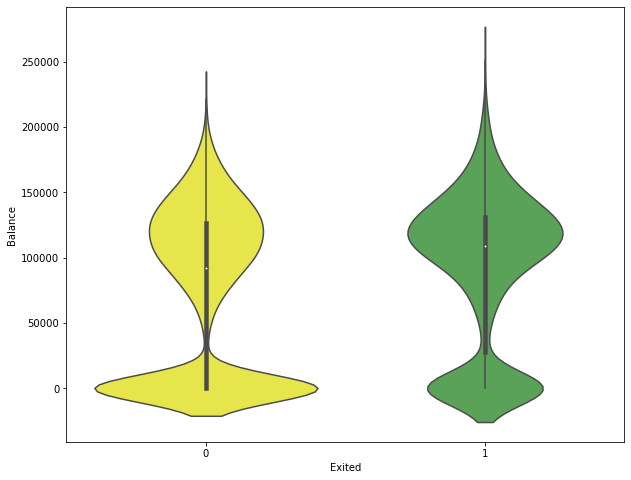

In [164]:
plt.figure(figsize=(10,8))
sns.violinplot(y='Balance',x='Exited',data=data,palette='Set1_r')

#### `Balance and exited are related`

### EstimatedSalary vs Exited

In [165]:
grp_retained = data.loc[data["Exited"]==0,'EstimatedSalary']
grp_closed = data.loc[data["Exited"]==1,'EstimatedSalary']

In [166]:
from scipy.stats import ttest_ind
ttest_results = ttest_ind(grp_retained,grp_closed)

In [167]:
ttest_results

Ttest_indResult(statistic=-0.9891707378122429, pvalue=0.3226046185199479)

<AxesSubplot:xlabel='Exited', ylabel='EstimatedSalary'>

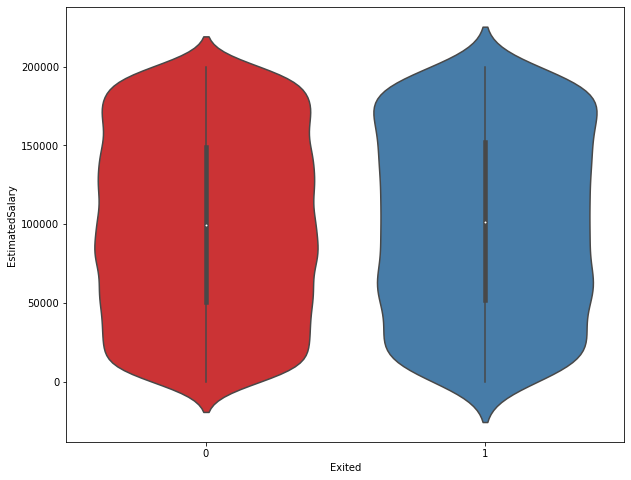

In [168]:
plt.figure(figsize=(10,8))
sns.violinplot(y='EstimatedSalary',x='Exited',data=data,palette='Set1')

#### `EstimatedSalary and exited are not related`

### `Gender, Geography vs Exited ( 2 way Anova )`

In [169]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

### perform two-way ANOVA
model = ols('Exited ~ Gender + Geography + Gender:Geography', data=data).fit()
sm.stats.anova_lm(model, typ=2)

sum_sq      df           F        PR(>F)
Gender              15.853559     1.0  102.672133  5.226414e-24
Geography           44.443634     2.0  143.914774  2.632471e-62
Gender:Geography     0.129719     2.0    0.420048  6.570275e-01
Residual          1477.236266  9567.0         NaN           NaN

 `Since the p-values for Gender and Geography are both less than .05, this means that both factors have a statistically significant effect on Exited`


--------------------
--------------------
--------------------
--------------------

## `Conclusion regarding target variable -----------------------------`

### `Are related`:
> - `CreditScore and exited are related`
> - `Geography and exited are related`
> - `Gender and exited are related`
> - `Age and exited are related`
> - `Tenure and exited are related`
> - `IsActiveMember and exited are related`
> - `NoOfProducts and exited are related`
> - `Balance and exited are related`


### `Are not related`:
> - `HasCrCard and exited are not related`
> - `EstimatedSalary and exited are not related`

--------------------
--------------------
--------------------
--------------------


## `Conclusion of Bivariate Analysis between all variables #########`:
### `Cat vs Cat`:
#### `Are Related`
> - `Geography and Gender are related`
> - `Geography and Exited are related`
#### `Are not Related`
> - ` Gender and HasCrCard are not related`
> - `Gender and IsActive Member are not related`
---
### `Num vs Num`:
#### `Are Related`
> - `Age and Balance are related`
#### `Are not Related`
> - `Age and CreditScore are not related`
> - `EstimatedSalary and Balance are not related`
> - `EstimatedSalary and CreditScore are not related`
> - `Balance and CreditScore are not related`

---
### `Cat vs Num`:
#### `Are Related`
> - `Balance and Exited are related`
> - `Balance and NoOfProducts are related`
> - `Balance and Geography are related`
> - `Balance and Tenure are related`
> - `Age and Gender are related`
> - `Age and IsActiveMember are related`
> - `Age and Exited are related`
> - `Age and NumOfProducts are related`
> - `Age and Geography are related`


#### `Are not Related`
> - `EstimatedSalary and Gender are not related`
> - `EstimatedSalary and HasCrCard are not related`
> - `EstimatedSalary and IsActiveMember are not related`
> - `EstimatedSalary and Exited are not related`
> - `EstimatedSalary and No of Products are not related`
> - `EstimatedSalary and Geography are not related`
> - `EstimatedSalary and Tenure are not related`
> - `Balance and Gender are not related`
> - `Balance and HasCrCard are not related`
> - `Balance and IsActiveMember are not related`
> - `Age and HasCrCard are not related`
> - `Age and Tenure are not related`
> - `CreditScore and Gender are not related`
> - `CreditScore and HasCrCard are not related`
> - `CreditScore and IsActiveMember are not related`
> - `CreditScore and Exited are not related`
> - `CreditScore and NumOfProducts are not related`
> - `CreditScore and Geography are not related`
> - `CreditScore and Tenure are not related`

## `Feature Selection ------------------------------`

<br />
<br />



- **Based on above analysis `Creditscore, Age, Tenure, Geography, Gender and Balance` are useful features that can be used to predict value for `Exited`**

<br />

- **Removed `IsActiveMember, NoOfProducts` because of Multicollinearity**  

<br />

- **Removed `HascrCard and EstiatedSalary` because they are not related to target variable `Exited`**


### Note:`Milan Sir Review needed before final model building`
<br />
<br />


### Future steps to be followed before model building
- **Label encoding for Gender**
- **One hot encoding for Geography**

## Problem Type: `It's a Classification problem`
<br />
<br />
<br />
<br />


# `End -----------------------------------`